# Clustering

Clustering is one of the most common machine learning algorithms. In this section, we will learn how to apply clustering to our data. 

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Data

In [4]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 4821-D018

 Directory of C:\Users\emura\Documents\ABD_YZ_Kursu\Day 4\Day4StudentFiles

18.02.2024  13:00    <DIR>          .
18.02.2024  10:36    <DIR>          ..
18.02.2024  12:58    <DIR>          .ipynb_checkpoints
18.02.2024  12:57           677.819 Billionaires.csv
17.02.2024  08:19           141.824 cars.xls
18.02.2024  13:00               916 Clustering.ipynb
18.02.2024  11:55           876.783 Day 4 - classification.ipynb
18.02.2024  08:15           223.120 hr_data.csv
               5 File(s)      1.920.462 bytes
               3 Dir(s)  30.470.307.840 bytes free


In [7]:
df=pd.read_excel('cars.xls')

In [8]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,804.0,21343.143767,9884.852801,8638.930895,14273.07387,18024.995019,26717.316636,70755.466717
Mileage,804.0,19831.934080,8196.319707,266.000000,14623.50000,20913.500000,25213.000000,50387.000000
Cylinder,804.0,5.268657,1.387531,4.000000,4.00000,6.000000,6.000000,8.000000
Liter,804.0,3.037313,1.105562,1.600000,2.20000,2.800000,3.800000,6.000000
Doors,804.0,3.527363,0.850169,2.000000,4.00000,4.000000,4.000000,4.000000
Cruise,804.0,0.752488,0.431836,0.000000,1.00000,1.000000,1.000000,1.000000
Sound,804.0,0.679104,0.467111,0.000000,0.00000,1.000000,1.000000,1.000000
Leather,804.0,0.723881,0.447355,0.000000,0.00000,1.000000,1.000000,1.000000


In [15]:
X=df[['Price','Mileage', 'Cylinder']]

## Modelling

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [17]:
X.head(9)

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6
5,15709.052821,22236,6
6,15230.003390,22576,6
7,15048.042184,22964,6
8,14862.093870,24021,6


In [18]:
model=KMeans(n_clusters=4, random_state=42)

In [19]:
model.fit(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [21]:
predicts=model.predict(X)

In [24]:
X['Cluster']=predicts

C:\Users\emura\AppData\Local\Temp\ipykernel_20448\1906182960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster']=predicts


In [25]:
X.head(9)

,Price,Mileage,Cylinder,Cluster
0,17314.103129,8221,6,2
1,17542.036083,9135,6,2
2,16218.847862,13196,6,2
3,16336.913140,16342,6,2
4,16339.170324,19832,6,1
5,15709.052821,22236,6,1
6,15230.003390,22576,6,1
7,15048.042184,22964,6,1
8,14862.093870,24021,6,1


In [32]:
silhouette_score(X, X['Cluster'])

0.4132257677906398

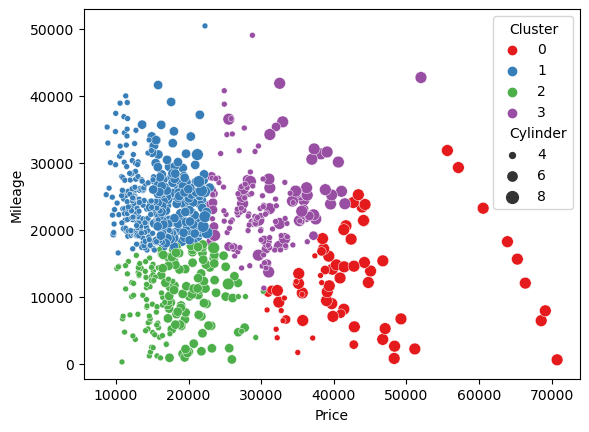

In [31]:
#graph 33 axis
sns.scatterplot(x=X['Price'], y=X['Mileage'], hue=X['Cluster'], size=X['Cylinder'], palette='Set1');

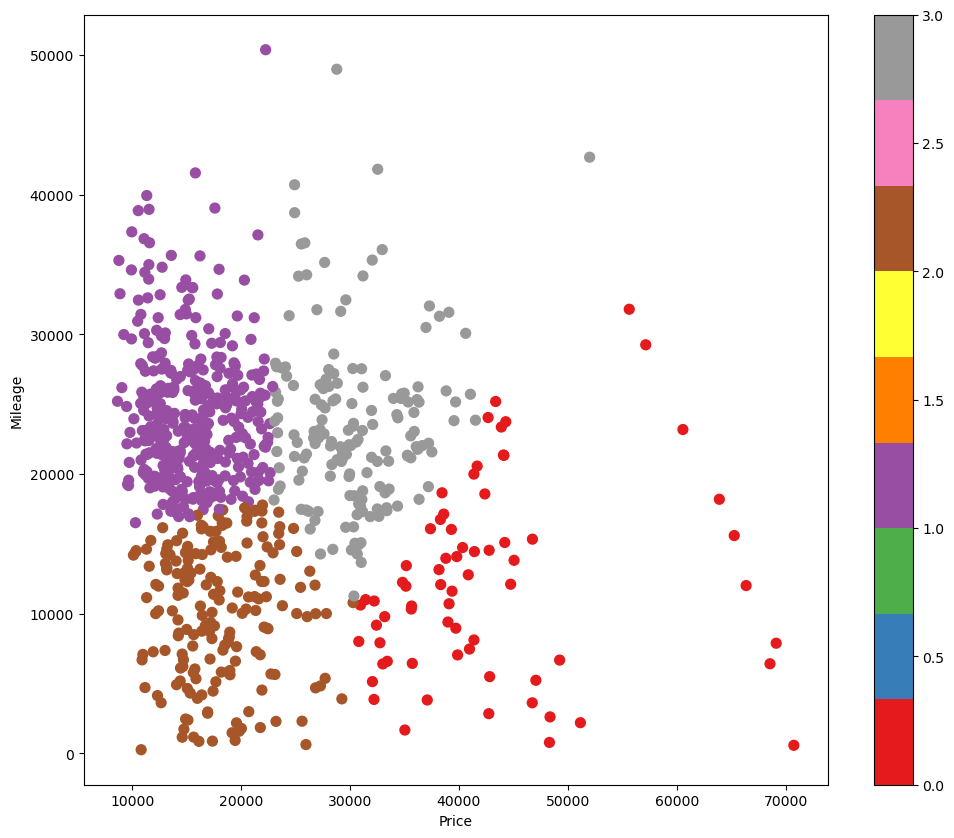

In [35]:
plt.figure(figsize=(12,10))
plt.scatter(X['Price'], X['Mileage'], c=X['Cluster'], s=50, cmap='Set1')
plt.colorbar()
plt.xlabel('Price')
plt.ylabel('Mileage')
plt.show()

In [42]:
import plotly.graph_objects as go

# Plotly grafik objesini oluştur
fig = go.Figure()
#fig size
fig.update_layout(width=800, height=800)


# 3D scatter plot ekleyin
fig.add_trace(go.Scatter3d(
    x=X['Price'],
    y=X['Mileage'],
    z=X['Cylinder'],
    mode='markers',
    marker=dict(
        size=5, # Noktaların boyutu
        color=X['Cluster'], # Her bir noktanın rengi, Cluster sütununa göre
        colorscale='Viridis', # Renk skalası
        opacity=0.8
    )
))

# Grafik başlığı ve eksen etiketlerini ayarlayın
fig.update_layout(
    title='3D Kümeleme Görselleştirme',
    scene = dict(
        xaxis_title='Fiyat',
        yaxis_title='Kilometre',
        zaxis_title='Silindir'
    )
)

# Grafik göster
fig.show()


In [43]:
pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     ---- -------------------------------- 30.7/282.6 kB 660.6 kB/s eta 0:00:01
     ----- ------------------------------- 41.0/282.6 kB 393.8 kB/s eta 0:00:01
     --------- --------------------------- 71.7/282.6 kB 653.6 kB/s eta 0:00:01
     --------- --------------------------- 71.7/282.6 kB 653.6 kB/s eta 0:00:01
     --------- --------------------------- 71.7/282.6 kB 653.6 kB/s eta 0:00:01
     --------- --------------------------- 71.7/282.6 kB 653.6 kB/s eta 0:00:01
     --------- --------------------------- 71.7/282.6 kB 653.6 kB/s eta 0:00:01
     --------- --------------------------- 71.7/282.6 kB 653.6 kB/s eta 0:00:01
     --------- --------------------------- 71.7/282.6 kB 653.6 kB/s eta 0:00:01
     --------- --------------------------- 71.7/282.6 kB 653.6 kB/s eta 0:00:01
     --------- --------------------------- 71.7/2

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [49]:
X.head()

,Price,Mileage,Cylinder,Cluster
0,17314.103129,8221,6,2
1,17542.036083,9135,6,2
2,16218.847862,13196,6,2
3,16336.913140,16342,6,2
4,16339.170324,19832,6,1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



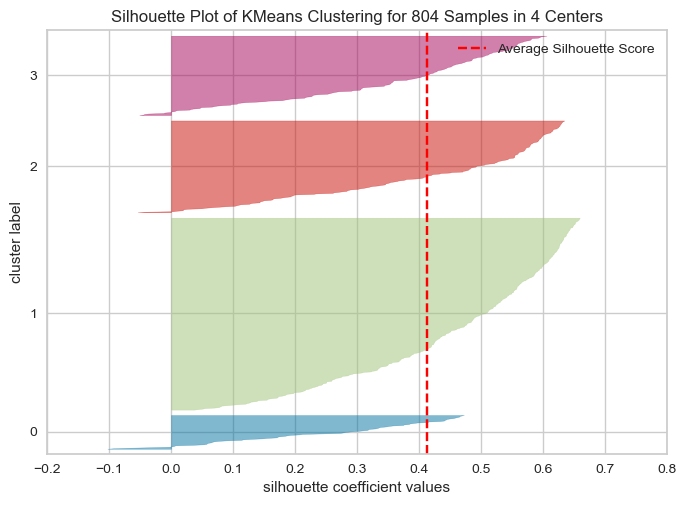

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 804 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [51]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

df=pd.read_excel('cars.xls')
X=df[['Price','Mileage', 'Cylinder']]

# Build a KMeans model
model = KMeans(n_clusters=4, random_state=42)

# SilhouetteVisualizer'ı model ile başlatın
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

# Görselleştiriciyi eğitin ve görselleştirin
visualizer.fit(X)  # X, özellik matrisinizdir
visualizer.show()


In [56]:
wcss = [] # Within-Cluster-Sum-of-Squares
import warnings
warnings.filterwarnings('ignore')
ss=[]
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    ss.append(silhouette_score(X, kmeans.predict(X)))

<Axes: >

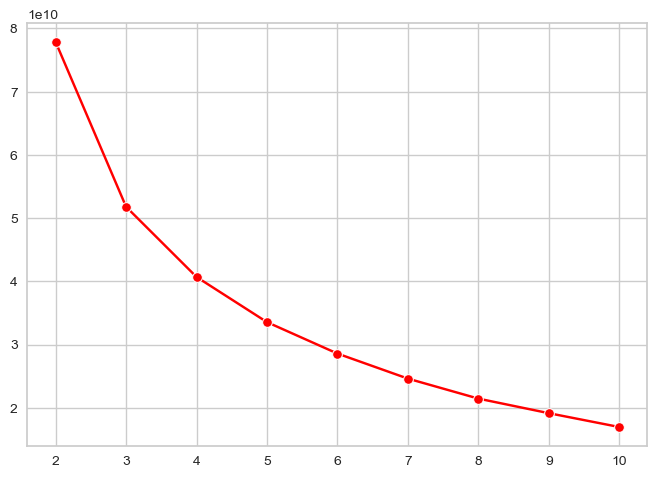

In [57]:
sns.lineplot(x=range(2, 11), y=wcss, marker='o', color='red')

In [58]:
pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [60]:
import yellowbrick as yb

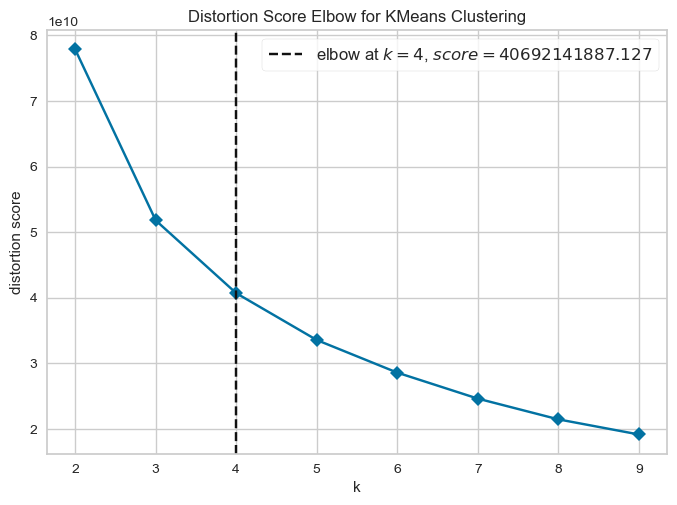

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False)

visualizer.fit(X)  
visualizer.show()



In [64]:
#hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage

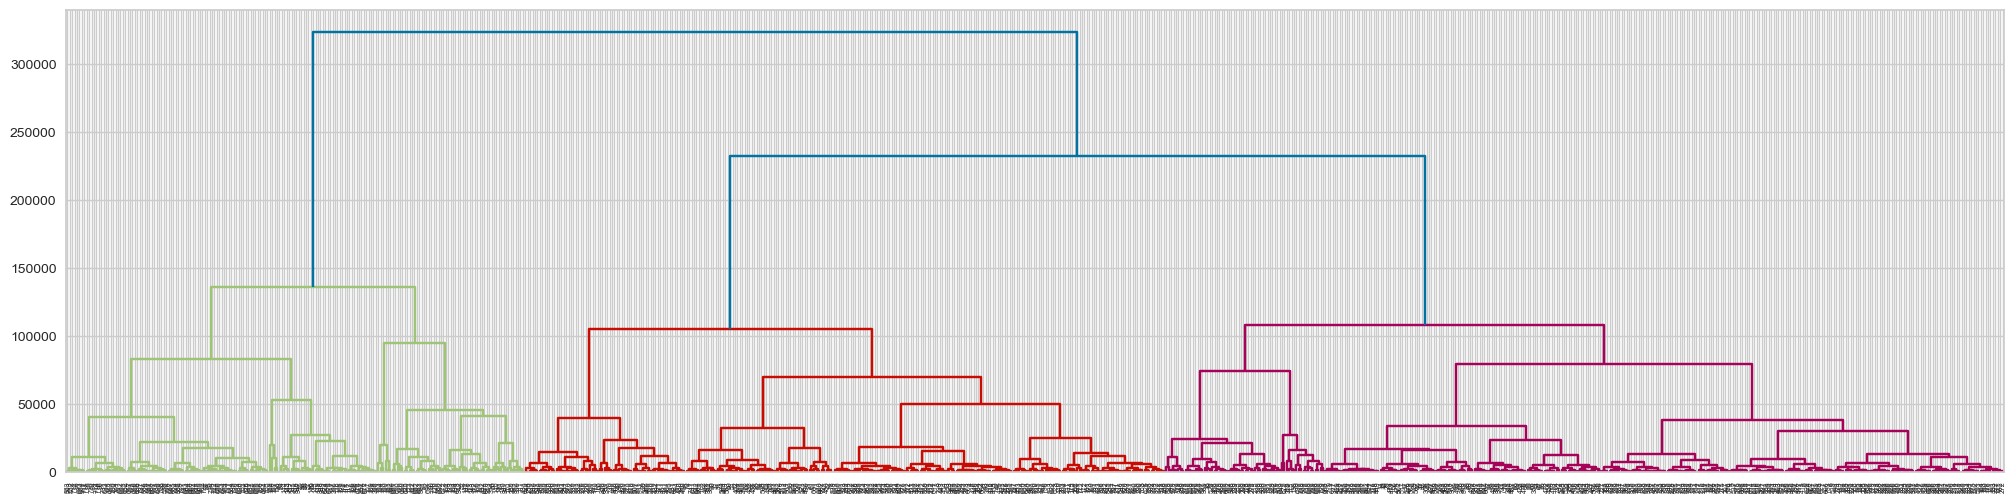

In [65]:
data=linkage(X, method='ward', metric='euclidean')
plt.figure(figsize=(25, 6))
dendrogram(data)
plt.show()

In [ ]:
# KElbowVisualizer ile modeli başlat
# 'k' değerlerinin aralığını belirtin (örneğin, 2'den 10'a kadar)
# 'metric' parametresi olarak 'distortion' kullanılır ki bu, WCSS'ye karşılık gelir
# X veri seti üzerinde visualizer'ı fit et ve çiz

## Evaluation of Clusters
 

### Metrics
    1. Silhouette Score

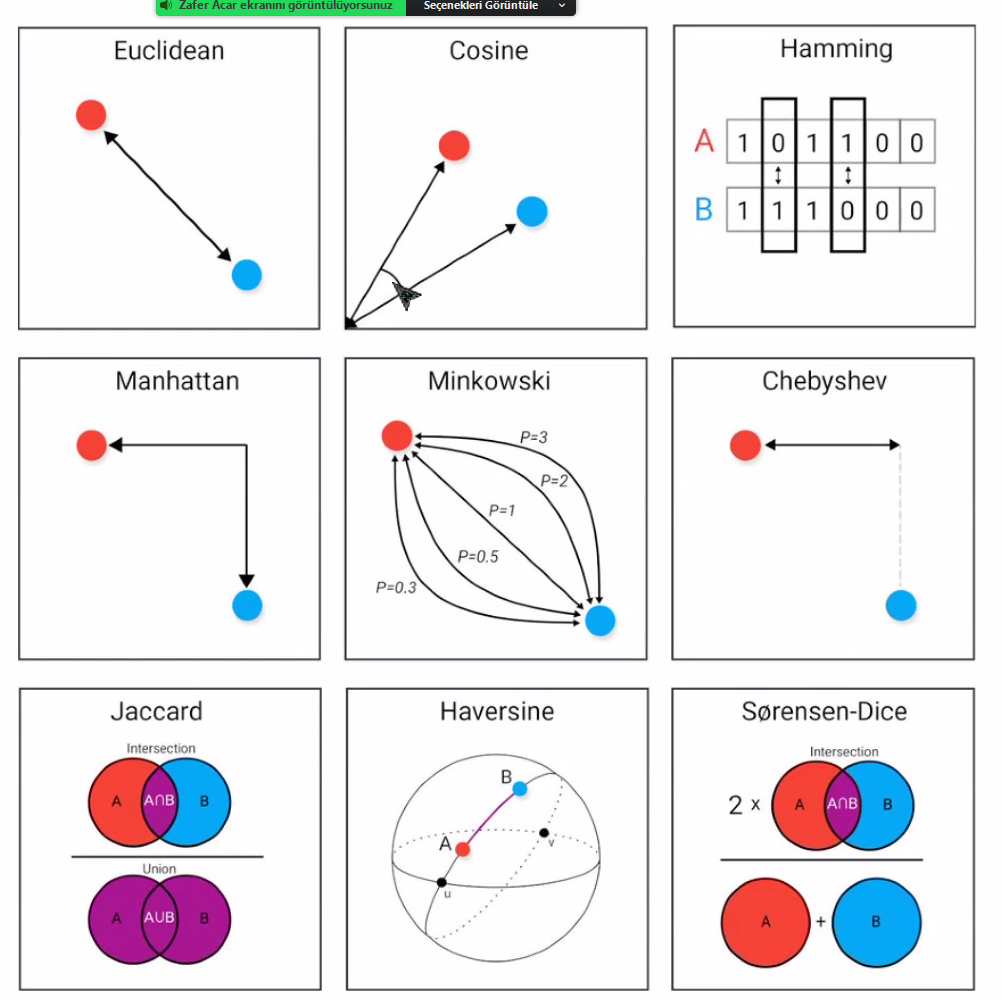

In [69]:
df=pd.read_csv('Billionaires.csv')

In [70]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


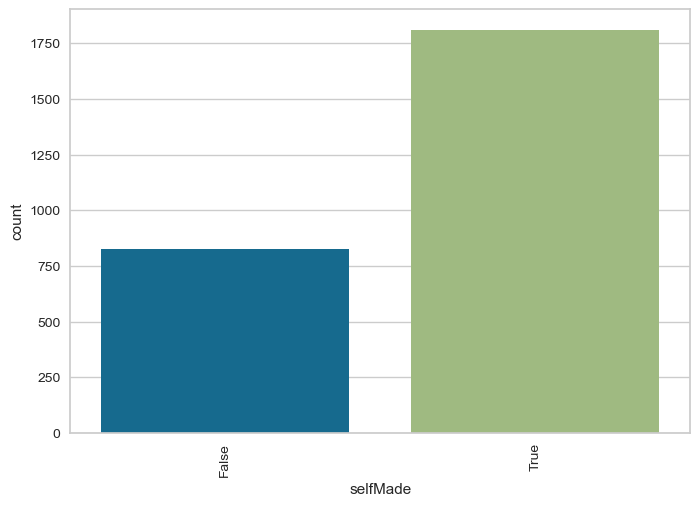

In [71]:
sns.countplot(x=df['selfMade'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='count', ylabel='country'>

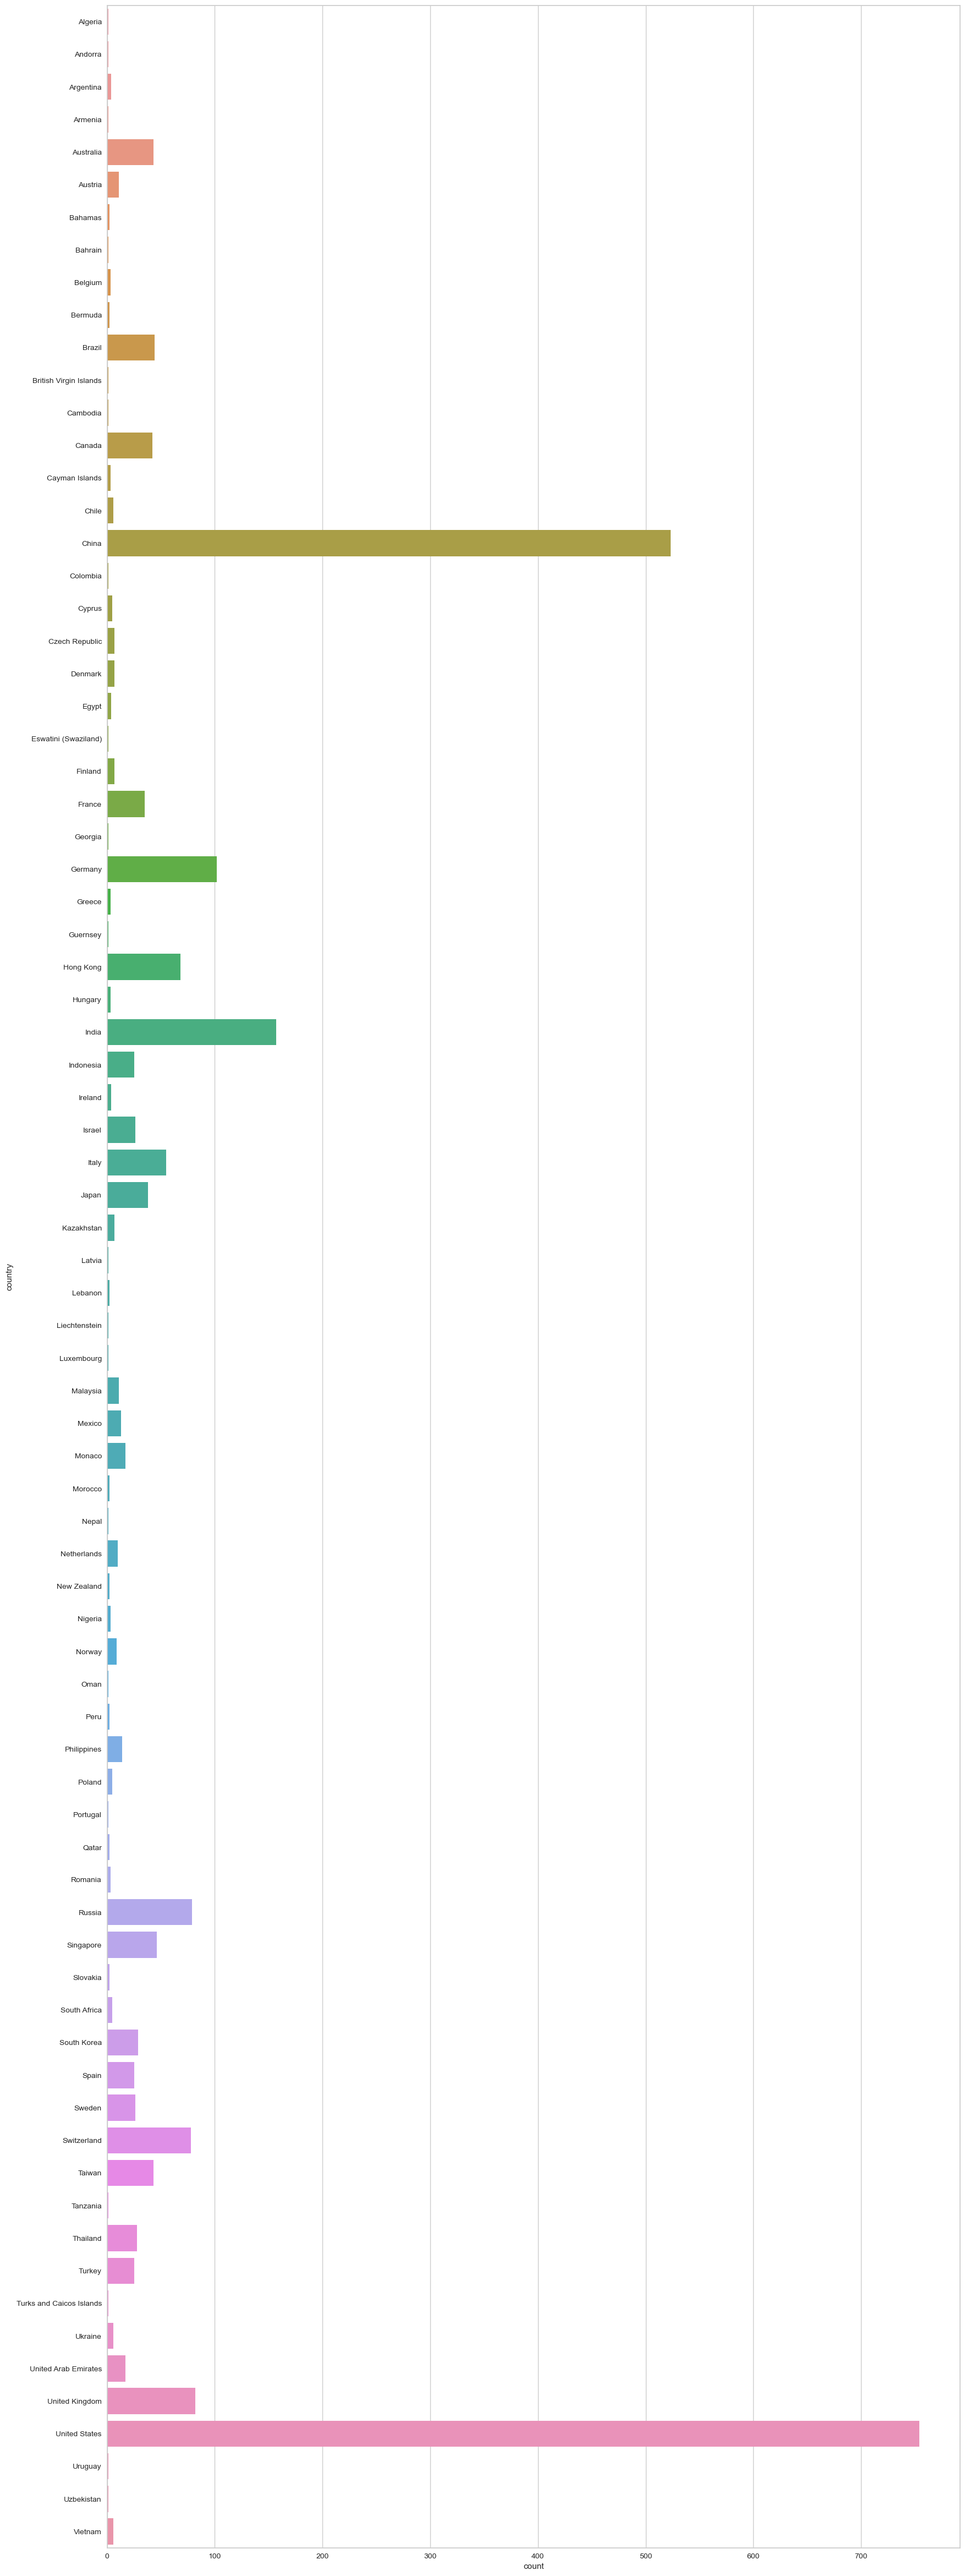

In [74]:
plt.figure(figsize=(20,60))
sns.countplot(y=df['country'])

In [73]:
df[df['country']=='Turkey']

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
498,497,5300,Manufacturing,Ibrahim Erdemoglu,60.0,Turkey,Istanbul,Carpet,Manufacturing,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
548,534,5000,Food & Beverage,Murat Ulker,64.0,Turkey,Istanbul,Food,Food & Beverage,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
582,580,4700,Manufacturing,Ali Erdemoglu,63.0,Turkey,Istanbul,Carpet,Manufacturing,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
982,982,3000,Diversified,Semahat Sevim Arsel,94.0,Turkey,Istanbul,Diversified,Diversified,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
1042,1027,2900,Diversified,Ipek Kirac,38.0,Turkey,Istanbul,Diversified,Diversified,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
1128,1104,2700,Diversified,Mustafa Rahmi Koc,92.0,Turkey,Istanbul,Diversified,Diversified,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
1242,1217,2500,Energy,Saban Cemil Kazanci,62.0,Turkey,Istanbul,Energy,Energy,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
1256,1217,2500,Diversified,Ferit Faik Sahenk,59.0,Turkey,Istanbul,Diversified,Diversified,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
1326,1312,2300,Construction & Engineering,Erman Ilicak,55.0,Turkey,Ankara,Construction,Construction & Engineering,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
1349,1312,2300,Diversified,Filiz Sahenk,56.0,Turkey,Istanbul,Diversified,Diversified,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322


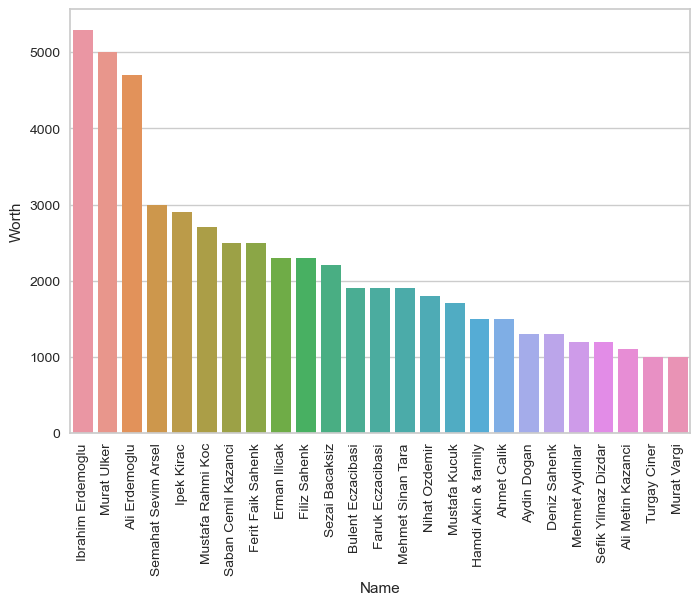

In [85]:
tr_df=df[df['country']=='Turkey']
sns.barplot(x=tr_df['personName'], y=tr_df['finalWorth'])
plt.xticks(rotation=90)
plt.xlabel('Name')
plt.ylabel('Worth')
plt.show()

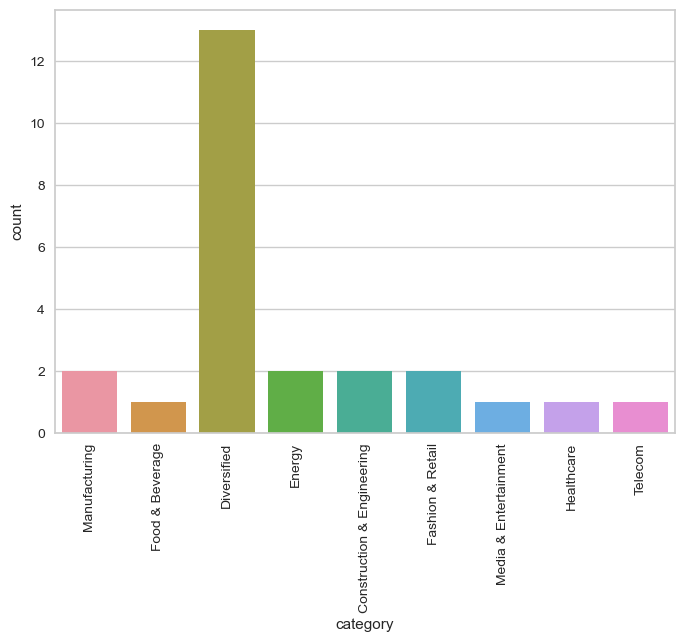

In [87]:
sns.countplot(x=tr_df['category'])
plt.xticks(rotation=90)
plt.show()

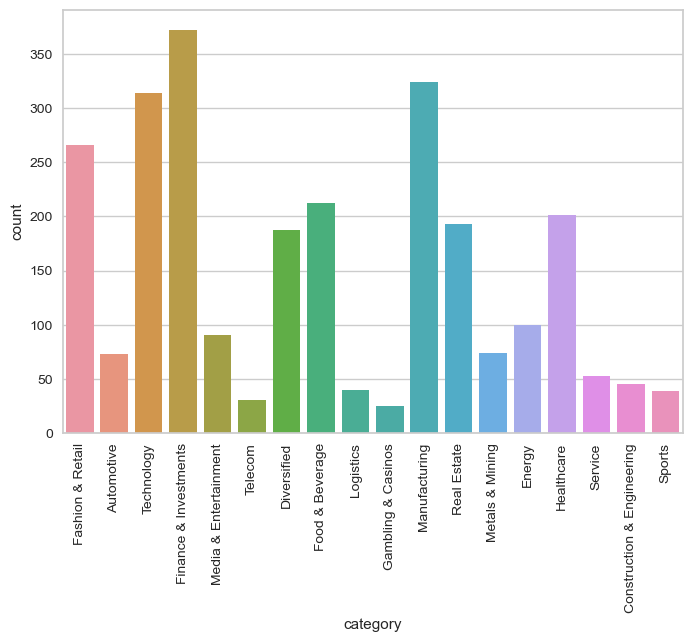

In [88]:
sns.countplot(x=df['category'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='gender', ylabel='count'>

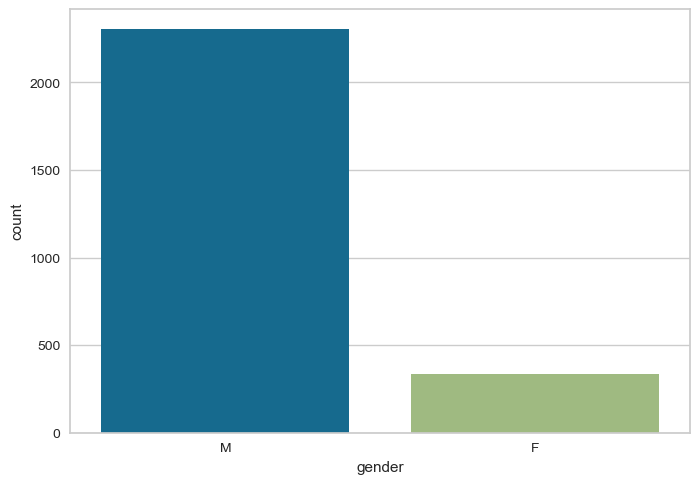

In [94]:
sns.countplot(x=df['gender'])

In [95]:
tr_df['gender'].value_counts()

M    21
F     4
Name: gender, dtype: int64

In [96]:
tr_df['gender'].value_counts(normalize=True)

M    0.84
F    0.16
Name: gender, dtype: float64